In [9]:
import zipfile
import os

# ZIP 파일 경로와 해제할 폴더 경로 설정
zip_file_path = '/data/comvi_pro/datasetzip/Yogurt_Detection.v3i.yolov8.zip'
extract_to_path = '/data/comvi_pro/333'

# ZIP 파일 열기
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # 파일 해제
    zip_ref.extractall(extract_to_path)

print(f"ZIP 파일이 '{extract_to_path}'에 성공적으로 해제되었습니다.")


ZIP 파일이 '/data/comvi_pro/333'에 성공적으로 해제되었습니다.


In [11]:
# strawberry 만 남기고 다 삭제
import os

# 클래스 이름과 인덱스
classes = ['banana', 'blueberry', 'grape', 'strawberry']
strawberry_class_index = classes.index('strawberry')

# 데이터셋 경로
base_dirs = ['/data/comvi_pro/333/train', '/data/comvi_pro/333/valid', '/data/comvi_pro/333/test']

def clean_dataset(base_dir, target_class_index):
    labels_dir = os.path.join(base_dir, 'labels')
    images_dir = os.path.join(base_dir, 'images')

    # 디렉토리 존재 여부 확인
    if not os.path.exists(labels_dir) or not os.path.exists(images_dir):
        print(f"디렉토리가 존재하지 않습니다: {labels_dir} 또는 {images_dir}")
        return

    for label_file in os.listdir(labels_dir):
        label_path = os.path.join(labels_dir, label_file)
        
        # 해당 이미지 파일 경로
        image_file = label_file.replace('.txt', '.jpg')  # 확장자가 JPG로 가정
        image_path = os.path.join(images_dir, image_file)
        
        # 라벨 파일에서 strawberry 확인
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        # 대상 클래스(strawberry)만 남기고 나머지 삭제
        new_lines = [line for line in lines if line.startswith(f"{target_class_index} ")]
        
        if new_lines:
            # strawberry 라벨만 남기고 파일 덮어쓰기
            with open(label_path, 'w') as f:
                f.writelines(new_lines)
        else:
            # strawberry 라벨이 없으면 라벨과 이미지 삭제
            os.remove(label_path)
            if os.path.exists(image_path):
                os.remove(image_path)
            print(f"삭제된 파일: {label_path} 및 {image_path}")

# 각 데이터셋 디렉토리에 대해 실행
for base_dir in base_dirs:
    clean_dataset(base_dir, strawberry_class_index)

print("데이터 정리가 완료되었습니다!")

삭제된 파일: /data/comvi_pro/333/train/labels/KakaoTalk_20231219_204509167_06_jpg.rf.1b00be535547f7e180c2496571bcd76d.txt 및 /data/comvi_pro/333/train/images/KakaoTalk_20231219_204509167_06_jpg.rf.1b00be535547f7e180c2496571bcd76d.jpg
삭제된 파일: /data/comvi_pro/333/train/labels/6_png.rf.28854d0ebc6a0064146f42c05a0013d2.txt 및 /data/comvi_pro/333/train/images/6_png.rf.28854d0ebc6a0064146f42c05a0013d2.jpg
삭제된 파일: /data/comvi_pro/333/train/labels/KakaoTalk_20231219_204552294_26_jpg.rf.4402dff8e4062e9851beb0a54db2ec07.txt 및 /data/comvi_pro/333/train/images/KakaoTalk_20231219_204552294_26_jpg.rf.4402dff8e4062e9851beb0a54db2ec07.jpg
삭제된 파일: /data/comvi_pro/333/train/labels/-2023-12-19-175706_png.rf.0405a5c955278b2022563ea15163b4c0.txt 및 /data/comvi_pro/333/train/images/-2023-12-19-175706_png.rf.0405a5c955278b2022563ea15163b4c0.jpg
삭제된 파일: /data/comvi_pro/333/train/labels/KakaoTalk_20231219_204552294_28_jpg.rf.e765e2c5c79ab6f597d9ff0bc468df35.txt 및 /data/comvi_pro/333/train/images/KakaoTalk_20231219_204

In [12]:
#라벨 3->0으로 변경

def clean_dataset(base_dir, target_class_index):
    labels_dir = os.path.join(base_dir, 'labels')
    images_dir = os.path.join(base_dir, 'images')

    # 디렉토리 존재 여부 확인
    if not os.path.exists(labels_dir) or not os.path.exists(images_dir):
        print(f"디렉토리가 존재하지 않습니다: {labels_dir} 또는 {images_dir}")
        return

    for label_file in os.listdir(labels_dir):
        label_path = os.path.join(labels_dir, label_file)
        
        # 해당 이미지 파일 경로
        image_file = label_file.replace('.txt', '.jpg')  # 확장자가 JPG로 가정
        image_path = os.path.join(images_dir, image_file)
        
        # 라벨 파일에서 strawberry 확인
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        # 대상 클래스(strawberry)만 남기고 나머지 삭제
        new_lines = [line for line in lines if line.startswith(f"{target_class_index} ")]
        
        if new_lines:
            # strawberry 라벨을 0으로 변경
            new_lines = [line.replace(f"{target_class_index} ", "0 ", 1) for line in new_lines]
            # strawberry 라벨만 남기고 파일 덮어쓰기
            with open(label_path, 'w') as f:
                f.writelines(new_lines)
        else:
            # strawberry 라벨이 없으면 라벨과 이미지 삭제
            os.remove(label_path)
            if os.path.exists(image_path):
                os.remove(image_path)
            print(f"삭제된 파일: {label_path} 및 {image_path}")

# 각 데이터셋 디렉토리에 대해 실행
for base_dir in base_dirs:
    clean_dataset(base_dir, strawberry_class_index)

print("데이터 정리가 완료되었습니다!")

데이터 정리가 완료되었습니다!


In [13]:
import shutil
import os

# 원본 및 대상 경로 설정
source_base_dir = '/data/comvi_pro/111'
destination_base_dir = '/data/comvi_pro/333'

# 데이터셋 디렉토리 목록
dataset_dirs = ['test', 'train', 'valid']

def copy_directory_contents(source_dir, destination_dir):
    # 디렉토리 존재 여부 확인 및 생성
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)
    
    # 파일 복사
    for item in os.listdir(source_dir):
        source_item = os.path.join(source_dir, item)
        destination_item = os.path.join(destination_dir, item)
        
        if os.path.isdir(source_item):
            # 디렉토리인 경우 재귀적으로 복사
            shutil.copytree(source_item, destination_item, dirs_exist_ok=True)
        else:
            # 파일인 경우 복사
            shutil.copy2(source_item, destination_item)

# 각 데이터셋 디렉토리에 대해 실행
for dataset_dir in dataset_dirs:
    source_dir = os.path.join(source_base_dir, dataset_dir)
    destination_dir = os.path.join(destination_base_dir, dataset_dir)
    
    # 디렉토리 복사
    copy_directory_contents(source_dir, destination_dir)

print("파일 복사가 완료되었습니다!")

파일 복사가 완료되었습니다!


In [14]:
# 데이터셋 경로
train_dir = '/data/comvi_pro/333/train/images'

def count_images(directory):
    if not os.path.exists(directory):
        print(f"디렉토리가 존재하지 않습니다: {directory}")
        return 0

    # 이미지 파일 수 세기
    image_count = len([file for file in os.listdir(directory) if file.endswith('.jpg')])
    return image_count

# train 디렉토리의 이미지 수 출력
train_image_count = count_images(train_dir)
print(f"Train 이미지 수: {train_image_count}")

Train 이미지 수: 921


In [15]:
%pip install ultralytics


Note: you may need to restart the kernel to use updated packages.


In [16]:
from ultralytics import YOLO

# YOLOv8 모델 로드 (새로 학습하거나 미리 학습된 모델 사용 가능)
model = YOLO('yolov8n.pt')  # 'yolov8n.pt', 'yolov8s.pt' 등 원하는 크기 선택 가능

# 학습
model.train(
    data='/data/comvi_pro/333/data.yaml',  # data.yaml 경로
    epochs=30,                        # 학습 반복 횟수
    batch=16,                         # 배치 크기
    imgsz=640,                        # 입력 이미지 크기
    name='strawberry_detection',      # 학습 결과 저장 폴더 이름
    device=0                          # GPU 사용 (0번 GPU), CPU 사용 시 'cpu'
)

# 모델 저장
model.save('strawberry_detection_model_test2.pt')

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.36 🚀 Python-3.8.10 torch-1.12.0.dev20220327+cu113 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 1g.10gb, 9728MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/data/comvi_pro/333/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=strawberry_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualiz

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


AMP: checks passed ✅


train: Scanning /data/comvi_pro/333/train/labels... 921 images, 0 backgrounds, 0 corrupt: 100%|██████████| 921/921 [00:00<00:00, 975.13it/s]

train: New cache created: /data/comvi_pro/333/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 165, len(boxes) = 8393. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning /data/comvi_pro/333/valid/labels... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<00:00, 117323.19it/s]

val: New cache created: /data/comvi_pro/333/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 38, len(boxes) = 860. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/strawberry_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/strawberry_detection
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/58 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
       1/30      2.58G      1.455      2.498      1.499         95        640: 100%|██████████| 58/58 [00:18<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]


                   all         88        860      0.494      0.384      0.265      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/58 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
       2/30      2.36G      1.389      1.563       1.44        132        640: 100%|██████████| 58/58 [00:10<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         88        860      0.516      0.466      0.458      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/58 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
       3/30      2.36G      1.334       1.38      1.381         95        640: 100%|██████████| 58/58 [00:10<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]


                   all         88        860      0.322      0.618      0.439      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.16G      1.317       1.31      1.323        226        640:   2%|▏         | 1/58 [00:00<00:09,  6.33it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
       4/30       2.3G      1.344      1.337      1.376        135        640: 100%|██████████| 58/58 [00:09<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         88        860      0.594      0.466      0.557      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.25G      1.348      1.308      1.404        202        640:   5%|▌         | 3/58 [00:00<00:08,  6.42it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
       5/30      2.26G      1.338      1.255      1.363         86        640: 100%|██████████| 58/58 [00:09<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         88        860      0.539      0.432      0.541      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.23G       1.37      1.236      1.386        252        640:   2%|▏         | 1/58 [00:00<00:09,  6.19it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
       6/30      2.37G      1.269      1.185      1.318        111        640: 100%|██████████| 58/58 [00:09<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]


                   all         88        860      0.686      0.659       0.74      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.39G      1.378      1.149      1.383        349        640:   5%|▌         | 3/58 [00:00<00:09,  5.88it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
       7/30       2.4G      1.266      1.101      1.314        133        640: 100%|██████████| 58/58 [00:09<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         88        860      0.741      0.626      0.755      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.17G      1.154     0.9517      1.273        267        640:   2%|▏         | 1/58 [00:00<00:09,  5.76it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
       8/30      2.46G      1.249      1.081      1.295        118        640: 100%|██████████| 58/58 [00:09<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         88        860      0.768      0.645      0.771      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.17G      1.288      1.111      1.334        253        640:   5%|▌         | 3/58 [00:00<00:08,  6.23it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
       9/30      2.44G      1.229      1.042      1.287        126        640: 100%|██████████| 58/58 [00:09<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         88        860      0.787      0.563      0.703      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.24G      1.101      1.169      1.223        167        640:   2%|▏         | 1/58 [00:00<00:08,  6.49it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      10/30      2.54G      1.215      1.036      1.287        117        640: 100%|██████████| 58/58 [00:09<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]


                   all         88        860      0.774        0.7      0.818      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.23G      1.133      0.986       1.24        212        640:   5%|▌         | 3/58 [00:00<00:08,  6.48it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      11/30      2.39G      1.206     0.9774      1.273         99        640: 100%|██████████| 58/58 [00:09<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         88        860      0.726      0.709      0.796      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       2.2G      1.241     0.9982      1.308        223        640:   2%|▏         | 1/58 [00:00<00:09,  6.13it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      12/30      2.36G      1.193     0.9484      1.269        130        640: 100%|██████████| 58/58 [00:09<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         88        860      0.745      0.711        0.8      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.23G      1.094     0.8838      1.249        205        640:   5%|▌         | 3/58 [00:00<00:08,  6.50it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      13/30      2.35G      1.163     0.9149      1.251        163        640: 100%|██████████| 58/58 [00:09<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         88        860      0.667      0.774      0.779      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.24G      1.194     0.9463      1.285        173        640:   2%|▏         | 1/58 [00:00<00:08,  6.48it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      14/30      2.36G      1.166     0.9029      1.253        160        640: 100%|██████████| 58/58 [00:09<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         88        860      0.751      0.797      0.814      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.16G      1.054     0.8464      1.183        211        640:   5%|▌         | 3/58 [00:00<00:09,  5.97it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      15/30       2.3G      1.136     0.8755      1.235        149        640: 100%|██████████| 58/58 [00:09<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         88        860      0.781      0.686      0.831      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.21G      1.147     0.9043      1.243        250        640:   2%|▏         | 1/58 [00:00<00:09,  6.19it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      16/30      2.33G      1.135       0.84      1.239        140        640: 100%|██████████| 58/58 [00:09<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         88        860      0.765      0.814      0.834      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.26G       1.16     0.8305      1.225        240        640:   5%|▌         | 3/58 [00:00<00:08,  6.26it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      17/30      2.39G      1.153      0.855      1.245         98        640: 100%|██████████| 58/58 [00:10<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         88        860      0.737      0.771      0.832      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.26G      1.176     0.8634      1.247        286        640:   2%|▏         | 1/58 [00:00<00:09,  6.07it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      18/30       2.4G      1.127      0.819      1.225        156        640: 100%|██████████| 58/58 [00:10<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         88        860      0.712      0.784      0.833      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.19G      1.158     0.8058      1.241        201        640:   5%|▌         | 3/58 [00:00<00:08,  6.27it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      19/30      2.31G      1.095     0.7884      1.209        149        640: 100%|██████████| 58/58 [00:09<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         88        860      0.752      0.739      0.812      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.19G      1.313     0.8906       1.38        171        640:   2%|▏         | 1/58 [00:00<00:10,  5.59it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      20/30      2.31G      1.119     0.8019      1.228        108        640: 100%|██████████| 58/58 [00:10<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         88        860       0.71      0.762      0.793      0.627


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.39G      1.132     0.8357      1.217        147        640:   5%|▌         | 3/58 [00:01<00:35,  1.54it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      21/30       2.4G      1.085      0.744      1.214         67        640: 100%|██████████| 58/58 [00:14<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         88        860      0.768      0.745       0.84       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.18G     0.7916     0.7157      1.118         92        640:   2%|▏         | 1/58 [00:00<00:08,  6.53it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      22/30      2.29G      1.076     0.7151      1.204        102        640: 100%|██████████| 58/58 [00:09<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         88        860      0.739      0.757      0.849      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       2.2G      1.171     0.7243      1.256        154        640:   5%|▌         | 3/58 [00:00<00:08,  6.40it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      23/30      2.21G      1.071     0.6917      1.208         69        640: 100%|██████████| 58/58 [00:09<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         88        860      0.742      0.825      0.852      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       2.2G      1.036     0.6216      1.169        144        640:   2%|▏         | 1/58 [00:00<00:08,  6.61it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      24/30      2.21G      1.048     0.6672      1.191         99        640: 100%|██████████| 58/58 [00:09<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         88        860       0.77       0.81      0.864      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.23G     0.9226     0.6791      1.127        137        640:   5%|▌         | 3/58 [00:00<00:08,  6.64it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      25/30      2.24G       1.02     0.6493      1.174        106        640: 100%|██████████| 58/58 [00:09<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]

                   all         88        860      0.738      0.817      0.857      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.17G       1.07     0.6285       1.14        200        640:   2%|▏         | 1/58 [00:00<00:09,  6.24it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      26/30      2.19G      1.008     0.6301      1.171         77        640: 100%|██████████| 58/58 [00:09<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         88        860      0.691      0.785      0.819      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       2.2G       1.18     0.6469      1.275        163        640:   5%|▌         | 3/58 [00:00<00:08,  6.52it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      27/30      2.21G     0.9969     0.6121      1.162         60        640: 100%|██████████| 58/58 [00:09<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         88        860      0.775       0.75       0.83      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30       2.2G      1.143     0.6282      1.252        129        640:   2%|▏         | 1/58 [00:00<00:09,  6.33it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      28/30      2.21G     0.9883     0.6019      1.151         97        640: 100%|██████████| 58/58 [00:09<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]

                   all         88        860      0.746       0.76      0.807      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       2.2G     0.9921     0.5982      1.165        155        640:   5%|▌         | 3/58 [00:00<00:08,  6.60it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      29/30      2.22G     0.9788     0.5886       1.15        107        640: 100%|██████████| 58/58 [00:09<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         88        860      0.725      0.775      0.823      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30       2.2G     0.9472     0.5744      1.162        144        640:   2%|▏         | 1/58 [00:00<00:08,  6.60it/s]/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
      30/30      2.21G     0.9706     0.5852      1.147         87        640: 100%|██████████| 58/58 [00:09<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         88        860      0.719      0.777      0.826      0.654



30 epochs completed in 0.096 hours.
Optimizer stripped from runs/detect/strawberry_detection/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/strawberry_detection/weights/best.pt, 6.3MB

Validating runs/detect/strawberry_detection/weights/best.pt...
Ultralytics 8.3.36 🚀 Python-3.8.10 torch-1.12.0.dev20220327+cu113 CUDA:0 (NVIDIA A100-SXM4-80GB MIG 1g.10gb, 9728MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.95s/it]


                   all         88        860      0.738      0.817      0.856      0.698
       ripe strawberry         83        778      0.873        0.8      0.892      0.602
    damaged strawberry         27         47      0.753      0.745      0.806      0.731
     rotten strawberry         10         28      0.829      0.866      0.905      0.761
      green strawberry          3          7        0.5      0.856       0.82      0.697
Speed: 0.8ms preprocess, 3.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/strawberry_detection



image 1/1 /data/comvi_pro/333/valid/images/tr2_2_0285_jpg.rf.e737b187d2b82626f768c6d16282c9ef.jpg: 640x640 8 ripe strawberrys, 2 damaged strawberrys, 1 green strawberry, 10.6ms
Speed: 1.4ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


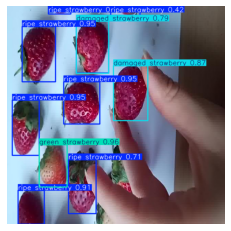

In [20]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 모델 로드
model = YOLO('/data/comvi_pro/strawberry_detection_model_test2.pt')

# 테스트할 이미지 경로 설정
test_image_path = '/data/comvi_pro/333/valid/images/tr2_2_0285_jpg.rf.e737b187d2b82626f768c6d16282c9ef.jpg'  # 실제 이미지 파일 이름으로 변경

# 이미지 로드
image = cv2.imread(test_image_path)

# 모델 예측
results = model.predict(source=test_image_path)

# 결과 시각화
# 결과 이미지를 가져옵니다.
result_image = results[0].plot()

# OpenCV는 BGR 형식으로 이미지를 로드하므로, RGB로 변환하여 표시합니다.
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
from ultralytics import YOLO
import cv2
import torch
import torchvision.transforms as transforms
from torchvision import models

# YOLO 모델 로드
yolo_model = YOLO('/data/comvi_pro/strawberry_detection_model_test2.pt')

# CNN 모델 로드 (예: ResNet)
cnn_model = models.resnet18(pretrained=True)
cnn_model.eval()

# 이미지 전처리
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 테스트할 이미지 경로 설정
test_image_path = '/data/comvi_pro/333/test/images/sample_image.jpg'  # 실제 이미지 파일 이름으로 변경

# 이미지 로드
image = cv2.imread(test_image_path)

# 모델 예측
results = yolo_model.predict(source=test_image_path)

# 결과 처리 및 분류
detections = results[0].boxes  # 감지된 객체의 바운딩 박스 정보

for box in detections:
    label = box.cls  # 객체의 라벨 인덱스
    confidence = box.conf  # 신뢰도
    bbox = box.xyxy  # 바운딩 박스 좌표

    # 객체 잘라내기
    x1, y1, x2, y2 = map(int, bbox)
    cropped_image = image[y1:y2, x1:x2]

    # 이미지 전처리
    input_tensor = preprocess(cropped_image)
    input_batch = input_tensor.unsqueeze(0)  # 배치 차원 추가

    # CNN 모델로 분류
    with torch.no_grad():
        output = cnn_model(input_batch)
        _, predicted = torch.max(output, 1)

    # 분류 결과 출력
    print(f"YOLO Label: {yolo_model.names[int(label)]}, CNN Predicted Class: {predicted.item()}")

# CNN 분류

In [46]:
# 150X150 이하는 고급 리사이징
from PIL import Image

image_path = '/data/comvi_pro/cropped_images/-2023-12-19-192516_png.rf.ebcf0d86e5d0a00ab53bf5cb89e71d38_crop_12.jpg'
image = Image.open(image_path)
width, height = image.size
print(f"Width: {width}, Height: {height}")

Width: 144, Height: 139


In [11]:
# ================================
# 1. YOLOv8 객체 감지 및 이미지 크롭 (최대 2000장, 작은 이미지는 제외)
# ================================
import os
import cv2
from ultralytics import YOLO

# YOLOv8 모델 로드
yolo_model = YOLO('/data/comvi_pro/strawberry_detection_model_test2.pt')  # 학습된 YOLO 모델 경로

# 데이터 경로 설정
image_dir = '/data/comvi_pro/333/train/images'  # 원본 이미지 경로
output_dir = '/data/comvi_pro/cropped_data'  # 잘라낸 이미지 저장 경로
os.makedirs(output_dir, exist_ok=True)

# 바운딩 박스 확장 함수
def expand_bounding_box(x1, y1, x2, y2, image_shape, margin=20):
    h, w = image_shape[:2]
    x1 = max(0, x1 - margin)
    y1 = max(0, y1 - margin)
    x2 = min(w, x2 + margin)
    y2 = min(h, y2 + margin)
    return x1, y1, x2, y2

# OpenCV를 사용한 고급 리사이징 함수
def upscale_with_opencv(image, scale_factor=2):
    """
    OpenCV를 사용하여 이미지를 고품질로 확대.
    :param image: 입력 이미지 (numpy 배열)
    :param scale_factor: 확대 배율
    """
    return cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

# 이미지 처리 및 저장
labels = []  # (파일명, 클래스ID)
max_images = 2000  # 최대 저장 이미지 개수
saved_image_count = 0  # 저장된 이미지 개수

for image_file in os.listdir(image_dir):
    if saved_image_count >= max_images:
        print("최대 저장 이미지 개수에 도달했습니다.")
        break

    if image_file.endswith('.jpg'):
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        results = yolo_model.predict(image_path, conf=0.5)
        
        for i, box in enumerate(results[0].boxes.xyxy.cpu().numpy()):
            if saved_image_count >= max_images:
                break  # 최대 개수 초과 시 중단
            
            x1, y1, x2, y2 = map(int, box)
            cls = int(results[0].boxes.cls[i])  # 클래스 ID
            x1, y1, x2, y2 = expand_bounding_box(x1, y1, x2, y2, image.shape, margin=20)
            
            # 바운딩 박스 영역 크롭
            cropped_image = image[y1:y2, x1:x2]
            h, w = cropped_image.shape[:2]

            # 이미지 크기가 너무 작은 경우 제외
            if h < 150 or w < 150:  # 크기 조건 (너무 작은 이미지 무시)
                continue

            # 이미지가 너무 작다면 리사이징
            if h < 150 or w < 150:
                cropped_image = cv2.resize(cropped_image, (150, 150), interpolation=cv2.INTER_CUBIC)

            # OpenCV를 사용한 추가 확대 적용
            upscaled_image = upscale_with_opencv(cropped_image, scale_factor=2)

            # 최종 이미지 저장
            final_image_path = os.path.join(output_dir, f"{os.path.splitext(image_file)[0]}_crop_{i}.jpg")
            cv2.imwrite(final_image_path, upscaled_image)
            labels.append((final_image_path, cls))
            saved_image_count += 1  # 저장된 이미지 개수 증가

print(f"총 저장된 이미지 개수: {saved_image_count}")



image 1/1 /data/comvi_pro/333/train/images/tr2_3_0065_jpg.rf.3fcafe4eefdd45e6d52197c57c6d591f.jpg: 640x640 3 ripe strawberrys, 2 damaged strawberrys, 11.0ms
Speed: 1.4ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/comvi_pro/333/train/images/KakaoTalk_20231219_204449840_07_jpg.rf.7262092ee96b014ec49b4976a66650be.jpg: 640x640 11 ripe strawberrys, 49.7ms
Speed: 1.4ms preprocess, 49.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/comvi_pro/333/train/images/-2023-12-19-193703_png.rf.9a8baf0381c414ce0105d17421764dee.jpg: 640x640 5 ripe strawberrys, 11.1ms
Speed: 1.3ms preprocess, 11.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/comvi_pro/333/train/images/68_png.rf.ba95577ae948fe57b1a5be4abc7b011a.jpg: 640x640 7 ripe strawberrys, 12.8ms
Speed: 1.4ms preprocess, 12.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /data/comvi_pro/

In [12]:
import os

# 저장된 이미지 파일 개수 확인
def count_saved_images(directory):
    # 디렉토리 내 모든 파일 중 확장자가 .jpg인 파일만 필터링
    image_files = [file for file in os.listdir(directory) if file.endswith('.jpg')]
    return len(image_files)

# 저장된 이미지 개수 출력
saved_images_count = count_saved_images(output_dir)
print(f"저장된 이미지 개수: {saved_images_count}")


저장된 이미지 개수: 2000


In [13]:
# ================================
# 2. 데이터셋 준비
# ================================
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# 하이퍼파라미터 설정
batch_size = 16  # 배치 크기
epochs = 10      # 학습 반복 횟수
learning_rate = 0.001  # 학습률
imgsz = 224     # 입력 이미지 크기

# 사용자 정의 Dataset
class CroppedDataset(Dataset):
    def __init__(self, labels, transform=None):
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image_path, label = self.labels[idx]
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Transform 정의
transform = transforms.Compose([
    transforms.Resize((imgsz, imgsz)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Dataset 및 DataLoader 생성
dataset = CroppedDataset(labels=labels, transform=transform)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [14]:
# ================================
# 3. CNN 모델 학습
# ================================

import torch.nn as nn
import torch.optim as optim
from torchvision import models

# GPU 강제 설정 (GPU가 반드시 있어야 함)
if not torch.cuda.is_available():
    raise EnvironmentError("CUDA가 지원되지 않는 환경입니다. GPU가 필요합니다.")
device = torch.device('cuda')  # GPU 사용 강제

# CNN 모델 정의 (ResNet18)
model = models.resnet18(pretrained=True)
num_classes = 4  # 클래스 수
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# 학습 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# 학습 루프
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# 모델 저장
torch.save(model.state_dict(), 'strawberry_classifier.pth')
print("모델 학습 완료 및 저장 완료!")


Epoch [1/10], Loss: 0.5940
Epoch [2/10], Loss: 0.4534
Epoch [3/10], Loss: 0.4171
Epoch [4/10], Loss: 0.3818
Epoch [5/10], Loss: 0.3475
Epoch [6/10], Loss: 0.3385
Epoch [7/10], Loss: 0.3027
Epoch [8/10], Loss: 0.2834
Epoch [9/10], Loss: 0.2416
Epoch [10/10], Loss: 0.2228
모델 학습 완료 및 저장 완료!


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py:1383: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


In [21]:
# ================================
# 4. 모델 평가 및 예측
# ================================
# 테스트 이미지 경로 설정
test_image_path = '/data/comvi_pro/333/cropped_data/26_jpg.rf.dc948a8cb5499e5aca524ede28396d4a_crop_2.jpg'

# 이미지 전처리
test_image = Image.open(test_image_path).convert('RGB')
test_tensor = transform(test_image).unsqueeze(0).to(device)

# 예측 수행
model.eval()
with torch.no_grad():
    output = model(test_tensor)
    predicted_class = torch.argmax(output, dim=1).item()

class_names = ['ripe strawberry', 'damaged strawberry', 'rotten strawberry', 'green strawberry']
print(f"예측 결과: {class_names[predicted_class]}")

예측 결과: ripe strawberry
